## Tráfico de Madrid

El dataset ['trafico_madrid.csv'](trafico_madrid.csv) contiene datos de tráfico. Distintos sensores de control de tráfico de la Comunidad de Madrid proporcionan datos sobre la intensidad de tráfico cada 15 minutos.

__Descripción de los datos de tráfico__


* `idelem`: Identificación  única  del  Punto  de  Medida  en  los  sistemas  de  control  del tráfico del Ayuntamiento de Madrid. 
* `fecha`: fecha en formato Año, mes, día, hora, minutos, segundos
* `intensidad`: Intensidad   del   Punto   de   Medida   en
   el   periodo   de   15   minutos  (vehículos/hora). 
* `vmed`: Velocidad  media  de  los  vehículos  en  el periodo  de  15  minutos  (Km./h). Sólo para puntos de medida interurbanos M30. 
* `error`: Indicación de si ha habido al menos una
 muestra errónea o sustituida en el periodo de 15 minutos. 
    * `N`: no ha habido errores ni sustituciones 
    * `E`: los parámetros de calidad de alguna de las muestras integradas no son óptimos. 
* `periodo_integracion`: Número   de   muestras   recibidas   y   consideradas

__1. Crea un dataframe con los datos del fichero  ['trafico_madrid.csv'](trafico_madrid.csv). En la lectura, transforma los datos `NaN` de la columna `error` por el valor `Y`.__

In [19]:
# Sol:
import pandas as pd
data = pd.read_csv('trafico_madrid.csv',  sep = ',',  parse_dates =[1])
data.head()

,idelem,fecha,identif,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,3621,2017-02-18 07:30:00,17016,PUNTOS MEDIDA URBANOS,207,0,8.0,0,N,15
1,3973,2017-02-07 00:00:00,06033,PUNTOS MEDIDA URBANOS,134,1,6.0,0,N,13
2,4064,2017-02-11 22:45:00,10018,PUNTOS MEDIDA URBANOS,169,3,NaN,0,NaN,15
3,6375,2017-02-08 00:00:00,59021,PUNTOS MEDIDA URBANOS,53,1,7.0,0,N,14
4,6691,2017-02-23 20:45:00,PM12121,--,2428,5,37.0,81,NaN,15


__2. Ordenar los datos en orden creciente de intensidad.__

In [17]:
# Sol:


,idelem,fecha,identif,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,3621,2017-02-18 07:30:00,17016,PUNTOS MEDIDA URBANOS,207,0,8.0,0,N,15
1,3973,2017-02-07 00:00:00,06033,PUNTOS MEDIDA URBANOS,134,1,6.0,0,N,13
2,4064,2017-02-11 22:45:00,10018,PUNTOS MEDIDA URBANOS,169,3,NaN,0,NaN,15
3,6375,2017-02-08 00:00:00,59021,PUNTOS MEDIDA URBANOS,53,1,7.0,0,N,14
4,6691,2017-02-23 20:45:00,PM12121,--,2428,5,37.0,81,NaN,15


__3. Seleccionar los puntos de medida URBANOS y posteriormente ordenar los datos en orden creciente de `intensidad` y orden decreciente de `carga`.__


In [7]:
# Sol: 
 

__4. ¿Cuantos valores `NaN` hay en la columna `carga`?__

In [8]:
# Sol:


__5. Sustituye los valores `NaN` de la columna `carga` por 0.__

In [9]:
# Sol:


__6. Elimina aquellas filas que tengan menos de 8 valores distintos de  `NaN`.__


In [11]:
# Sol:


__6. Elimina aquellas filas que tengan algún valor  `NaN`.__

In [12]:
# Sol:


In [9]:
tf.tipo_elem.value_counts()

PUNTOS MEDIDA URBANOS    7816294
PUNTOS MEDIDA M-30       1007223
Name: tipo_elem, dtype: int64

El valor devuelto por el método `value_counts()` es una serie. Para convertirlo en dataframe utilizamos el método `reset_index()`.

In [10]:
tf.tipo_elem.value_counts().reset_index()

,index,tipo_elem
0,PUNTOS MEDIDA URBANOS,7816294
1,PUNTOS MEDIDA M-30,1007223


La siguiente figura muestra en un mapa las distintas estaciones de tráfico y las estaciones de aire.

![Entorno](./images/estaciones.jpg "jupyter notebook")


-----
Podemos preguntar acerca del número de muestras consideradas para el cálculo de la intensidad:

In [11]:
tf.periodo_integracion.value_counts().reset_index()

,index,periodo_integracion
0,15,6738368
1,14,489858
2,5,373479
3,13,253298
4,12,161149
5,11,113305
6,1,113039
7,10,91408
8,3,84858
9,2,84365


#### Para visualización

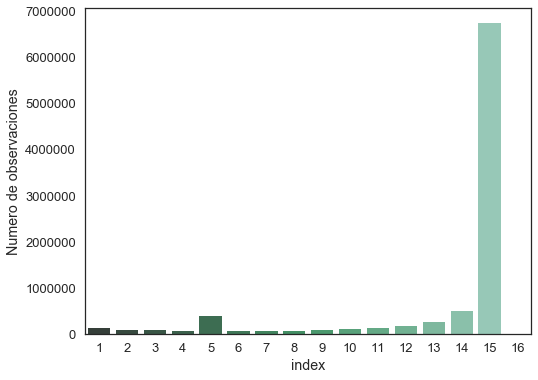

In [12]:
import seaborn as sns

sns.set(style="white", context="talk")

ranking = tf.periodo_integracion.value_counts().reset_index().sort_values(by = 'index')

# figuras
f, ax1 = plt.subplots(1, figsize=(8, 6))

# Ejemplo 1
sns.barplot(ranking['index'], ranking.periodo_integracion, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Numero de observaciones");

In [13]:
f.savefig('pd.jpg')

### Análisis estadístico

Con los dataframes creados es posible realizar operaciones estadísticas mediante las funciones y métodos proporcionados por la librería. Por ejemplo, la media, la suma, etc...

In [14]:
# valor máximo de intensidad en el mes de febrero de 2017
tf.intensidad.max()

99999

In [15]:
# valor mínimo de intensidad en el mes de febrero de 2017
tf.intensidad.min()

0

In [16]:
# valor medio
tf.intensidad.mean()

491.7426563580033

In [17]:
# desviación típica
tf.intensidad.std()

760.7516804691924

In [18]:
# suma de todas la intensidades
tf.intensidad.sum()

43932392

El método `describe()` calcula los primeros estadísticos para las columnas numéricas:

In [19]:
tf.describe()

,idelem,intensidad,ocupacion,periodo_integracion
count,8.823517e+06,8.823517e+06,8.823517e+06,8.823517e+06
mean,5.500865e+03,4.917427e+02,6.736623e+00,1.359151e+01
std,1.667975e+03,7.607517e+02,1.108778e+01,3.327914e+00
min,1.001000e+03,0.000000e+00,-1.000000e+00,1.000000e+00
25%,4.275000e+03,7.400000e+01,1.000000e+00,1.500000e+01
50%,5.452000e+03,2.300000e+02,3.000000e+00,1.500000e+01
75%,6.373000e+03,5.890000e+02,8.000000e+00,1.500000e+01
max,1.018100e+04,9.999900e+04,1.000000e+02,1.600000e+01


## Transformar datos

Pandas dispone de gran cantidad de funciones para el tratamiento de datos de tipo texto. 

Una transformación muy sencilla es la de acortar los nombre de la columna `tipo_elem`. Por ejemplo eliminado el prefijo `PUNTOS MEDIDA`. Para ello utilizamos el método  `apply` junto con la función `replace`.

In [20]:
tf.tipo_elem = tf.tipo_elem.apply(lambda x :x.replace('PUNTOS MEDIDA ', ''))

In [21]:
tf.tail()

,idelem,fecha,tipo_elem,intensidad,ocupacion,periodo_integracion
8823512,9900,2017-02-28 09:45:00,URBANOS,463,3,15
8823513,9975,2017-02-28 09:45:00,URBANOS,292,3,15
8823514,9974,2017-02-28 09:45:00,URBANOS,488,4,15
8823515,9973,2017-02-28 09:45:00,URBANOS,83,2,15
8823516,9976,2017-02-28 09:45:00,URBANOS,175,3,15


In [22]:
tf.tipo_elem.value_counts()

URBANOS    7816294
M-30       1007223
Name: tipo_elem, dtype: int64

In [23]:
tf.columns

Index(['idelem', 'fecha', 'tipo_elem', 'intensidad', 'ocupacion',
       'periodo_integracion'],
      dtype='object')

In [24]:
tf.tipo_elem = tf.tipo_elem.apply(lambda x :x.title())

In [25]:
tf.head()

,idelem,fecha,tipo_elem,intensidad,ocupacion,periodo_integracion
0,3753,2017-02-18 01:45:00,Urbanos,1986,23,15
1,4021,2017-02-18 01:45:00,Urbanos,330,1,15
2,4022,2017-02-18 01:45:00,Urbanos,298,1,15
3,4023,2017-02-18 01:45:00,Urbanos,263,4,15
4,4024,2017-02-18 01:45:00,Urbanos,95,0,15


In [26]:
tf.tipo_elem.value_counts()

Urbanos    7816294
M-30       1007223
Name: tipo_elem, dtype: int64

## Filtros

Supongamos que queremos centrar el análisis en las estaciones de tráfico de la M30. 

En Pandas, para seleccionar un conjunto de tuplas utilizamos lo que se denominan filtros, que no son más que una serie  con valores que indican si la tupla debe ser filtrada o no. Los filtros se crean utilizado operadores de comparación (==, >, <, ...).

In [27]:
tf.tipo_elem == 'M-30'

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
8823487     True
8823488     True
8823489     True
8823490     True
8823491     True
8823492     True
8823493     True
8823494    False
8823495    False
8823496    False
8823497    False
8823498    False
8823499    False
8823500    False
8823501    False
8823502    False
8823503    False
8823504    False
8823505    False
8823506    False
8823507    False
8823508    False
8823509    False
8823510    False
8823511    False
8823512    False
8823513    False
8823514    Fal

In [28]:
tf_m30 = tf[tf.tipo_elem == 'M-30']

In [29]:
tf_m30.head()

,idelem,fecha,tipo_elem,intensidad,ocupacion,periodo_integracion
315,1010,2017-02-13 11:45:00,M-30,2640,5,5
317,1044,2017-02-13 11:45:00,M-30,948,6,5
330,3542,2017-02-13 11:45:00,M-30,2592,7,5
331,7119,2017-02-13 11:45:00,M-30,1728,7,5
402,1021,2017-02-13 11:45:00,M-30,2364,6,5


In [30]:
tf_m30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007223 entries, 315 to 8823493
Data columns (total 6 columns):
idelem                 1007223 non-null int64
fecha                  1007223 non-null datetime64[ns]
tipo_elem              1007223 non-null object
intensidad             1007223 non-null int64
ocupacion              1007223 non-null int64
periodo_integracion    1007223 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 53.8+ MB


Seleccionar solo aquellas tuplas o filas de las estaciones situadas dentro de la M-30 con intensidad de tráfico superior a 5000.

In [31]:
# intensidad > 1000
alta = tf_m30[tf_m30.intensidad > 5000 ]

In [32]:
alta.tail()

,idelem,fecha,tipo_elem,intensidad,ocupacion,periodo_integracion
8823355,6840,2017-02-28 09:45:00,M-30,6456,21,5
8823356,6839,2017-02-28 09:45:00,M-30,5256,19,5
8823359,6843,2017-02-28 09:45:00,M-30,5376,11,5
8823487,3819,2017-02-28 09:45:00,M-30,6829,11,15
8823488,3820,2017-02-28 09:45:00,M-30,5128,15,15


In [33]:
alta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35846 entries, 2142 to 8823488
Data columns (total 6 columns):
idelem                 35846 non-null int64
fecha                  35846 non-null datetime64[ns]
tipo_elem              35846 non-null object
intensidad             35846 non-null int64
ocupacion              35846 non-null int64
periodo_integracion    35846 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.9+ MB


## Crear nuevos datos

Cuando trabamos con datos, es muy habitual construir nuevos datos a partir de otros. Por ejemplo, puede ser útil añadir a los datos de tráfico una nueva columna que represente el día de la semana.

El método `map` permite aplicar funciones a cada uno de los valores de una columna del dataframe para producir una nueva columna.

In [34]:
col_dia = tf_m30.fecha.map(lambda x : x.day)    # crear una nueva columna

In [35]:
col_dia.value_counts()

26    36468
25    36388
24    36376
27    36371
28    36327
5     36165
14    36161
17    36140
20    36119
8     36093
7     36064
15    36035
3     36034
4     36020
10    36012
1     36009
16    35972
18    35955
13    35945
6     35905
2     35891
23    35853
11    35845
9     35841
12    35776
19    35710
21    35608
22    34140
Name: fecha, dtype: int64

In [36]:
tf_m30.insert(2, 'dia', col_dia)        # insertarla en el dataframe
tf_m30.head()

,idelem,fecha,dia,tipo_elem,intensidad,ocupacion,periodo_integracion
315,1010,2017-02-13 11:45:00,13,M-30,2640,5,5
317,1044,2017-02-13 11:45:00,13,M-30,948,6,5
330,3542,2017-02-13 11:45:00,13,M-30,2592,7,5
331,7119,2017-02-13 11:45:00,13,M-30,1728,7,5
402,1021,2017-02-13 11:45:00,13,M-30,2364,6,5


## Combinación de datos

Para las estaciones de tráfico de la M30, conocemos el identificador, pero no tenemos información geográfica ni una descripción.

Queremos conocer la intensidad de tráfico registrada por la estación `P1 Castellana S-N - Pl. Colon-Ayala`, el día en que se ha producido mayor intensidad, etc...

La información de los nombres o descripciones de las estaciones se encuentran en otro dataset. Esta vez se trata de un fichero en forma Excel. Pandas proporciona la función `read_excel` para crear un dataframe a partir de una hoja de cálculo.

In [37]:
desc_tr = pd.read_excel('./pd_trafico/descripcion_est_traf.xlsx')
desc_tr.head()

,idelem,nombre
0,16007,Cuesta San Vicente O-E - Gran Via-Ferraz
1,16005,San Leonardo E-O - Maestro Guerrero-Princesa
2,17021,(AFOROS) Princesa S-N - San Leonardo-Duque de ...
3,16042,Cuesta San Vicente O-E - Bailen-Gran Via
4,16301,(MICRO) Cuesta San Vicente S-N(Delante G.2)(P....


In [38]:
coor_tf = pd.read_csv('./pd_trafico/pmed_trafico_coord.csv', sep = ';', decimal= b',',
                         usecols = ['idelem', 'Xcoord', 'Ycoord'])
coor_tf.head()

,idelem,Xcoord,Ycoord
0,1044,-3.720754,40.419125
1,3600,-3.664409,40.406252
2,3705,-3.709906,40.390721
3,6823,-3.717737,40.384554
4,7033,-3.690105,40.426231


Como podemos observar, los dataframes recién creados contienen la columna `idelem` que representa el código de la estación de tráfico. 

Lo que haremos a continuación será unir la información de ambos dataframes en un único dataframe. Utilizamos la función  `merge` de Pandas.

In [39]:
merged_1 = pd.merge(desc_tr, coor_tf,  on = 'idelem' ) 

In [40]:
merged_1.head()

,idelem,nombre,Xcoord,Ycoord
0,1021,"Hortaleza, 75 S-N - Travesia San Mateo-Fernand...",-3.702702,40.393459
1,1020,Fernado VI E-O - Campoamor-Hortaleza,-3.698097,40.389509
2,1010,Pl. Santa Barbara S-N - Serrano Anguita-Pl. A...,-3.725040,40.416313
3,1017,Barbara Braganza O-E - Conde Xiquena-Tamayo y...,-3.725528,40.422277
4,1009,(AFOROS) Genova 13 E-O - Zurbano-Campoamor,-3.724906,40.416234


In [41]:
merged = pd.merge(tf_m30, merged_1,  on = 'idelem' ) 

In [42]:
merged.head()

,idelem,fecha,dia,tipo_elem,intensidad,ocupacion,periodo_integracion,nombre,Xcoord,Ycoord
0,1010,2017-02-13 11:45:00,13,M-30,2640,5,5,Pl. Santa Barbara S-N - Serrano Anguita-Pl. A...,-3.72504,40.416313
1,1010,2017-02-22 15:15:00,22,M-30,1320,3,5,Pl. Santa Barbara S-N - Serrano Anguita-Pl. A...,-3.72504,40.416313
2,1010,2017-02-01 21:30:00,1,M-30,3036,7,5,Pl. Santa Barbara S-N - Serrano Anguita-Pl. A...,-3.72504,40.416313
3,1010,2017-02-09 16:30:00,9,M-30,4680,11,5,Pl. Santa Barbara S-N - Serrano Anguita-Pl. A...,-3.72504,40.416313
4,1010,2017-02-17 07:15:00,17,M-30,1168,2,5,Pl. Santa Barbara S-N - Serrano Anguita-Pl. A...,-3.72504,40.416313


Para conocer la intensidad de tráfico registrada por la estación `P1 Castellana S-N - Pl. Colon-Ayala` tenemos que utilizar los filtros.

In [43]:
tf_castellana = merged[merged.nombre == 'P1 Castellana S-N - Pl. Colon-Ayala']
tf_castellana.head()

,idelem,fecha,dia,tipo_elem,intensidad,ocupacion,periodo_integracion,nombre,Xcoord,Ycoord
28861,1030,2017-02-11 00:30:00,11,M-30,228,3,5,P1 Castellana S-N - Pl. Colon-Ayala,-3.706254,40.395465
28862,1030,2017-02-01 21:30:00,1,M-30,576,7,5,P1 Castellana S-N - Pl. Colon-Ayala,-3.706254,40.395465
28863,1030,2017-02-10 08:45:00,10,M-30,492,7,5,P1 Castellana S-N - Pl. Colon-Ayala,-3.706254,40.395465
28864,1030,2017-02-03 12:00:00,3,M-30,552,8,5,P1 Castellana S-N - Pl. Colon-Ayala,-3.706254,40.395465
28865,1030,2017-02-17 07:15:00,17,M-30,408,5,5,P1 Castellana S-N - Pl. Colon-Ayala,-3.706254,40.395465


In [44]:
tf_castellana.intensidad.max()

1104

In [45]:
tf_castellana[tf_castellana.intensidad == tf_castellana.intensidad.max()]

,idelem,fecha,dia,tipo_elem,intensidad,ocupacion,periodo_integracion,nombre,Xcoord,Ycoord
29879,1030,2017-02-10 14:45:00,10,M-30,1104,15,5,P1 Castellana S-N - Pl. Colon-Ayala,-3.706254,40.395465


El día 10 de Febrero a las 14:45 se registra un pico en intensidad de tráfico en la estación `P1 Castellana S-N - Pl. Colon-Ayala`.


## Ordenar datos

Otra tarea muy típica cuando se trabaja con datos es la ordenación. Utilizamos el método `sort_values()` de Pandas indicando el campo de ordenación.

In [46]:
merged.sort_values('intensidad', ascending = False)

,idelem,fecha,dia,tipo_elem,intensidad,ocupacion,periodo_integracion,nombre,Xcoord,Ycoord
24137,1003,2017-02-07 07:45:00,7,M-30,7656,26,5,P1 Recoletos N-S - Almirante-Prim,-3.746831,40.406825
25277,1003,2017-02-16 07:45:00,16,M-30,7536,24,5,P1 Recoletos N-S - Almirante-Prim,-3.746831,40.406825
26165,1003,2017-02-28 07:45:00,28,M-30,7536,25,5,P1 Recoletos N-S - Almirante-Prim,-3.746831,40.406825
43522,1018,2017-02-16 15:30:00,16,M-30,7512,14,5,(AFOROS) Pa Castellana N-S - Eduardo Dato-Marq...,-3.724722,40.421812
25488,1003,2017-02-20 08:00:00,20,M-30,7500,25,5,P1 Recoletos N-S - Almirante-Prim,-3.746831,40.406825
23739,1003,2017-02-01 07:45:00,1,M-30,7440,25,5,P1 Recoletos N-S - Almirante-Prim,-3.746831,40.406825
25978,1003,2017-02-24 07:30:00,24,M-30,7428,25,5,P1 Recoletos N-S - Almirante-Prim,-3.746831,40.406825
25909,1003,2017-02-23 07:45:00,23,M-30,7416,23,5,P1 Recoletos N-S - Almirante-Prim,-3.746831,40.406825
25028,1003,2017-02-15 08:30:00,15,M-30,7404,23,5,P1 Recoletos N-S - Almirante-Prim,-3.746831,40.406825
23965,1003,2017-02-03 08:30:00,3,M-30,7392,28,5,P1 Recoletos N-S - Almirante-Prim,-3.746831,40.406825


## Grupos y operaciones de agrupación

* Supongamos que queremos calcular la intensidad máxima registrada por tipo de elemento (M-30 o Urbano)
* Supongamos que queremos calcular la intensidad media de tráfico por estación.
* Supongamos que queremos calcular la intensidad media de tráfico por día del mes.

Pandas proporciona el método `groupby` para construir grupos sobre los cuales se aplica posteriormente alguna operación de agregación, como la media, la suma, máximo, etc.

In [47]:
# intensidad máxima por tipo de elemento
tf.groupby(['tipo_elem']).intensidad.max().reset_index()

,tipo_elem,intensidad
0,M-30,9232
1,Urbanos,99999


In [48]:
# intensidad media por tipo de elemento
tf.groupby(['tipo_elem']).intensidad.mean().reset_index()

,tipo_elem,intensidad
0,M-30,1448.641587
1,Urbanos,368.434780


In [49]:
# los dos valores, el máximo y la media
tf.groupby(['tipo_elem']).intensidad.agg([max, np.mean])

,max,mean
tipo_elem,,
M-30,9232,1448.641587
Urbanos,99999,368.434780


Intensidad media por estación. Además ordenamos los valores obtenidos de forma descendente.

In [50]:
tf.groupby(['idelem']).intensidad.mean().sort_values(ascending = False)

idelem
3819     4456.097987
6679     4083.683408
6666     3931.986235
6747     3852.108340
6733     3773.160424
6725     3744.718524
6676     3677.470961
3820     3672.540984
6846     3667.480655
6756     3597.010789
6727     3519.084720
6642     3485.329081
3490     3393.583333
6842     3387.531994
6737     3377.491071
6845     3376.241443
3823     3316.648801
6715     3315.266017
3799     3301.719494
6843     3290.052455
6685     3247.393376
6662     3201.364083
3815     3175.915551
6789     3103.891686
6665     3099.061384
6663     3086.258752
3491     3083.810640
6847     3067.225818
6683     3060.428359
6654     3057.895089
            ...     
6895       17.471354
6187       16.473885
5029       16.318182
5187       16.298578
5993       16.076299
7000       15.666667
6537       15.555556
5033       15.530000
6236       15.300000
5089       15.226316
6539       14.750220
3928       13.715711
10135      13.710000
6626       13.514539
4914       13.144873
5032       11.596875
5173  

__Agrupar por varios campos__

Para calcular la intensidad media de tráfico por día del mes, tenemos que agrupar por dos columnas:

In [51]:
tf_m30.groupby(['idelem', 'dia']).intensidad.mean().reset_index()

,idelem,dia,intensidad
0,1001,1,1854.416667
1,1001,2,1903.354167
2,1001,3,2023.281250
3,1001,4,1656.604167
4,1001,5,1049.250000
5,1001,6,1887.500000
6,1001,7,1705.750000
7,1001,8,1954.375000
8,1001,9,2241.500000
9,1001,10,2064.375000


Cuando se trabaja con fechas, podemos agrupar los datos por minutos, horas, días, años, etc. En este caso, vamos a agrupar los datos por horas y calculamos la media de intensidad de todas las estaciones por hora. Para ellos usamos el método `resemple` de Pandas. 

__Agrupar datos teniendo en cuenta la fecha__

In [52]:
tf.resample('H', on='fecha').apply(np.mean).intensidad.reset_index().head()

,fecha,intensidad
0,2017-02-01 00:00:00,164.886881
1,2017-02-01 01:00:00,84.339541
2,2017-02-01 02:00:00,51.511014
3,2017-02-01 03:00:00,39.851909
4,2017-02-01 04:00:00,39.069174


__Agrupar por varios campos__

In [53]:
tf.groupby(['fecha', 'idelem']).intensidad.mean().reset_index()

,fecha,idelem,intensidad
0,2017-02-01 00:00:00,1001,372
1,2017-02-01 00:00:00,1002,684
2,2017-02-01 00:00:00,1003,600
3,2017-02-01 00:00:00,1006,744
4,2017-02-01 00:00:00,1009,648
5,2017-02-01 00:00:00,1010,1116
6,2017-02-01 00:00:00,1011,672
7,2017-02-01 00:00:00,1012,384
8,2017-02-01 00:00:00,1013,780
9,2017-02-01 00:00:00,1014,420


## Exportar datos a formatos excel, csv, txt, json

In [54]:
tf_m30

,idelem,fecha,dia,tipo_elem,intensidad,ocupacion,periodo_integracion
315,1010,2017-02-13 11:45:00,13,M-30,2640,5,5
317,1044,2017-02-13 11:45:00,13,M-30,948,6,5
330,3542,2017-02-13 11:45:00,13,M-30,2592,7,5
331,7119,2017-02-13 11:45:00,13,M-30,1728,7,5
402,1021,2017-02-13 11:45:00,13,M-30,2364,6,5
403,7121,2017-02-13 11:45:00,13,M-30,2868,7,5
405,6849,2017-02-13 11:45:00,13,M-30,996,6,5
406,6858,2017-02-13 11:45:00,13,M-30,3072,11,5
408,6850,2017-02-13 11:45:00,13,M-30,2964,10,5
409,6856,2017-02-13 11:45:00,13,M-30,336,3,5


In [57]:
tf_m30.to_excel('./trafico_m30.xlsx')

Exception ignored in: <bound method Workbook.__del__ of <xlsxwriter.workbook.Workbook object at 0x000001FA08D2E390>>
Traceback (most recent call last):
  File "C:\Users\Yoli\Anaconda3\lib\site-packages\xlsxwriter\workbook.py", line 149, in __del__
    raise Exception("Exception caught in workbook destructor. "
Exception: Exception caught in workbook destructor. Explicit close() may be required for workbook.


In [55]:
tf_m30.to_csv('trafico_m30.csv', index = False)

## Visualización

Existen varias librerías para realizar las tareas de visualización:

### Matplotlib

Matplotlib es una de las librerías en Python más utilizadas en ciencia de datos.

* Una de las características que hace que tenga éxito es __la facilidad de uso__

* Visualizaciones de datos con __muy pocas líneas de código__ 

* Los gráficos se puedan incluir en cualquier proyecto web

* Diagramas de barras


Gráficos de áreas, histogramas, visualizaciones de líneas, barras, diagramas de dispersión… matplotlib es una de las librerías en Python más utilizadas en ciencia de datos.

[Librería gráfica matplotlib](http://matplotlib.org/) (http://matplotlib.org/)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Diagrama de barras

Representación de la intensidad media por día del mes.

In [57]:
# intensidad media de tráfico recogida por cada estación cada día de la semana
# preparo los datos: agrupo por día y calculo la media de la intensidad
pordias = tf_m30.groupby(['dia']).intensidad.mean().reset_index()

In [58]:
pordias.head()

,dia,intensidad
0,1,1562.337471
1,2,1572.550222
2,3,1599.078592
3,4,1175.492921
4,5,1036.042030


C:\Users\Yoli\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


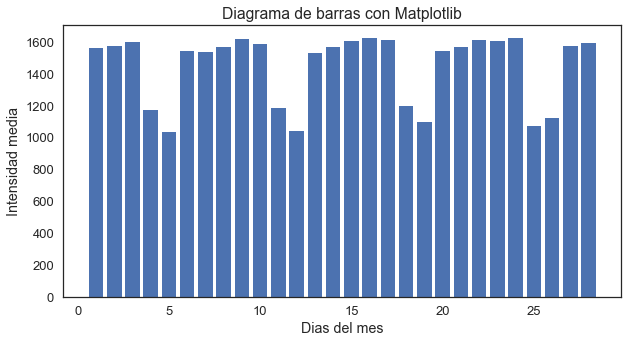

In [59]:
fig, ax = plt.subplots(nrows = 1, figsize=(10,5))
ax.bar(pordias.dia, pordias.intensidad)  
ax.legend(loc=0)

ax.set_title('Diagrama de barras con Matplotlib')
ax.set_xlabel('Dias del mes')
ax.set_ylabel('Intensidad media');

### Seaborn

Seaborn es una librería de visualización de datos en Python basada en matplotlib. Sus características:

- Mejora el diseño de matplotlib.

- Dispone de herramientas para la elección de paletas de colores.

- Funciones para comparar subconjuntos de datos.

- Herramientas para adaptar y visualizar modelos de regresión lineal.

- Funciones para visualizar matrices de datos.

- Uso de algoritmos de clustering.

- Posibilidad de establecer series temporales estadísticas con los datos.

[Seaborn](https://seaborn.pydata.org/)  (https://seaborn.pydata.org/)

In [60]:
# módulos necesarios
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Diagrama de barras con Seaborn

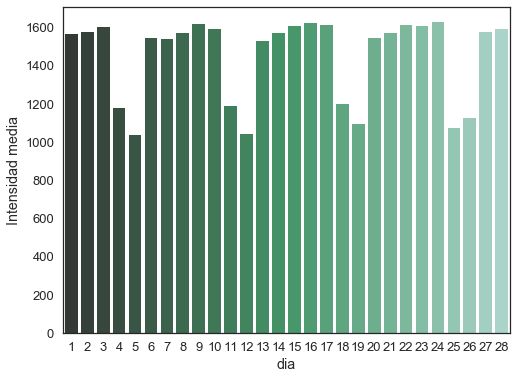

In [61]:
sns.set(style="white", context="talk")

# figuras
f, ax1 = plt.subplots(1, figsize=(8, 6))

# Ejemplo 1
sns.barplot(pordias.dia, pordias.intensidad, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Intensidad media");

#### Diagramas de calor

Creamos un dataframe aplicando el método `pivot_table`. La nueva tabla se crea a partir de 3 columnas.

In [62]:
tf_p = tf_m30.pivot_table(index = "idelem", columns = "dia", values = "intensidad")

In [63]:
tf_p.head(10)

dia,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
idelem,,,,,,,,,,,,,,,,,,,,,
1001,1854.416667,1903.354167,2023.28125,1656.604167,1049.250000,1887.500,1705.750000,1954.375000,2241.500000,2064.3750,...,1438.916667,1939.708333,2049.020833,2197.12500,2038.75000,2165.406250,584.65625,1481.375000,1773.854167,1886.250
1002,2249.500000,2258.250000,2328.12500,1716.229167,1492.500000,2238.000,2180.312500,2169.375000,2313.000000,2353.5000,...,1551.666667,2150.833333,2229.354167,2287.18750,2312.84375,2405.364583,527.65625,1600.041667,2271.562500,2302.000
1003,2968.041667,3023.416667,3073.25000,2276.666667,1969.125000,2935.375,2881.062500,2849.875000,3024.125000,3075.3750,...,2050.666667,2872.208333,2953.104167,3018.62500,3093.25000,3183.229167,821.96875,2260.645833,2981.208333,3013.375
1006,2313.437500,2329.791667,2327.15625,1753.468750,1530.750000,2256.375,2192.812500,2271.000000,2359.250000,2497.6250,...,1574.875000,2206.875000,2247.645833,2287.65625,2376.53125,2484.968750,677.84375,1700.062500,2315.895833,2339.125
1009,2329.875000,2361.708333,2377.68750,1753.625000,1564.500000,2265.875,2303.625000,2269.500000,2389.250000,2388.6250,...,1566.208333,2258.666667,2309.770833,2376.03125,2382.90625,2442.187500,852.96875,1721.104167,2345.427083,2386.875
1010,2265.062500,2319.687500,2308.71875,1694.500000,1419.083333,2466.750,2030.458333,2568.166667,2929.833333,2927.4375,...,1998.166667,2000.239583,1748.666667,1164.37500,1696.50000,1820.291667,479.50000,743.166667,1685.270833,1747.000
1011,1414.312500,1424.062500,1451.84375,1006.260417,931.625000,1400.750,1374.187500,1395.875000,1468.625000,1433.1250,...,965.875000,1420.000000,1425.729167,1423.87500,1411.40625,1498.270833,447.71875,1052.208333,1420.302083,1485.375
1012,647.354167,664.562500,717.84375,509.864583,496.125000,670.375,661.125000,689.125000,708.125000,767.3750,...,500.541667,679.541667,667.270833,673.96875,700.12500,763.114583,274.28125,556.250000,696.000000,687.875
1013,1983.791667,1979.041667,1996.90625,1359.802083,1266.250000,1912.500,1994.437500,1985.625000,2027.875000,1962.6250,...,1401.375000,1984.375000,2038.916667,2052.81250,2051.62500,2049.479167,809.34375,1442.270833,1997.864583,2006.500


Construimos un diagrama de calor de las 10 primeras estaciones:

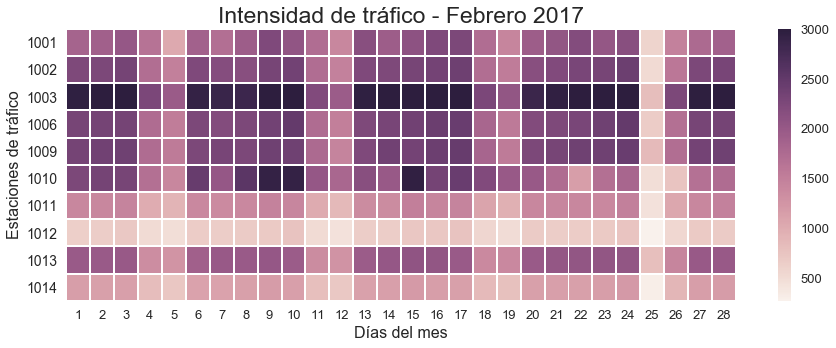

In [73]:
fig, g = plt.subplots(figsize=(15, 5))
# mapa de calor
sns.heatmap(tf_p.head(10), annot=False, vmax=3000, linewidths=1, ax = g);

g.set_title('Intensidad de tráfico - Febrero 2017', fontsize = 23);
g.axes.xaxis.set_label_text("Días del mes", fontdict={"size":16})
g.axes.yaxis.set_label_text("Estaciones de tráfico", fontdict={"size":16})
plt.yticks( rotation='horizontal', fontsize = 14);

In [74]:
fig.savefig?

¿Cuál es el nombre de las estación 1012?

In [65]:
merged[merged.idelem == 1012]

,idelem,fecha,dia,tipo_elem,intensidad,ocupacion,periodo_integracion,nombre,Xcoord,Ycoord
53053,1012,2017-02-25 09:45:00,25,M-30,180,1,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859
53054,1012,2017-02-01 09:15:00,1,M-30,972,9,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859
53055,1012,2017-02-01 21:45:00,1,M-30,828,8,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859
53056,1012,2017-02-03 12:15:00,3,M-30,780,8,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859
53057,1012,2017-02-05 19:45:00,5,M-30,852,8,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859
53058,1012,2017-02-01 09:30:00,1,M-30,960,10,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859
53059,1012,2017-02-02 22:45:00,2,M-30,756,7,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859
53060,1012,2017-02-04 14:45:00,4,M-30,1152,10,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859
53061,1012,2017-02-05 04:30:00,5,M-30,72,1,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859
53062,1012,2017-02-04 01:15:00,4,M-30,516,4,5,P0 Recoletos N-S - (PL. Colon-BErbara Braga...,-3.722132,40.419859


### Bokeh

Se trata de una librería al estilo JavaScript D3.js.
* Es una librería __interactiva__.
* Cada gráfico tiene asociado su código HTML para incluirlo en una página web. 
* Consultar la galería http://bokeh.pydata.org/en/latest/docs/gallery.html

#### Series de tiempo

Representación de la evolución de la media de la intensidad a lo largo del tiempo:

In [66]:
porfecha = tf_m30.groupby(['fecha']).intensidad.mean().reset_index()
porfecha.head()

,fecha,intensidad
0,2017-02-01 00:00:00,496.671088
1,2017-02-01 00:15:00,451.864721
2,2017-02-01 00:30:00,397.740053
3,2017-02-01 00:45:00,329.132626
4,2017-02-01 01:00:00,267.466844


In [67]:
from bokeh.plotting import figure, output_notebook, show, output_file
output_notebook()    # para visualizar el gráfico en el notebook


output_file("datetime.html")
p = figure(title="Series de tiempo", plot_width=600, plot_height=300, x_axis_type="datetime")
p.line(porfecha.fecha, porfecha.intensidad, color='navy', alpha=0.8)

show(p)

Loading BokehJS ...

## Otra librería de Visualización: python-higthcharts

HighChart es una librería escrita en Javascript que permite la creación de gráficas. La librería ofrece un método fácil e interactivo para insertar graficas en su sitio web o aplicación web.

In [ ]:
from highcharts import Highchart # import highchart library
H = Highchart(width=650, height=400)
data = [{
            'name': "Microsoft Internet Explorer",
            'y': 56.33,
            'drilldown': "Microsoft Internet Explorer"
        }, {
            'name': "Chrome",
            'y': 24.030000000000005,
            'drilldown': "Chrome"
        }, {
            'name': "Firefox",
            'y': 10.38,
            'drilldown': "Firefox"
        }, {
            'name': "Safari",
            'y': 4.77,
            'drilldown': "Safari"
        }, {
            'name': "Opera",
            'y': 0.9100000000000001,
            'drilldown': "Opera"
        }, {
            'name': "Proprietary or Undetectable",
            'y': 0.2,
            'drilldown': None
        }]

data_1 = [
    ["v11.0", 24.13],
    ["v8.0", 17.2],
    ["v9.0", 8.11],
    ["v10.0", 5.33],
    ["v6.0", 1.06],
    ["v7.0", 0.5]
]

data_2 = [
    ["v40.0", 5],
    ["v41.0", 4.32],
    ["v42.0", 3.68],
    ["v39.0", 2.96],
    ["v36.0", 2.53],
    ["v43.0", 1.45],
    ["v31.0", 1.24],
    ["v35.0", 0.85],
    ["v38.0", 0.6],
    ["v32.0", 0.55],
    ["v37.0", 0.38],
    ["v33.0", 0.19],
    ["v34.0", 0.14],
    ["v30.0", 0.14]      
]

data_3 = [
    ["v35", 2.76],
    ["v36", 2.32],
    ["v37", 2.31],
    ["v34", 1.27],
    ["v38", 1.02],
    ["v31", 0.33],
    ["v33", 0.22],
    ["v32", 0.15]
]
data_4 = [
    ["v8.0", 2.56],
    ["v7.1", 0.77],
    ["v5.1", 0.42],
    ["v5.0", 0.3],
    ["v6.1", 0.29],
    ["v7.0", 0.26],
    ["v6.2", 0.17]
]

data_5 = [
    ["v12.x", 0.34],
    ["v28", 0.24],
    ["v27", 0.17],
    ["v29", 0.16]
]

# Añadimos los datos
H.add_data_set(data, series_type = 'column', name = "Marcas", colorByPoint= True)

H.add_drilldown_data_set(data_1, 'column', 'Microsoft Internet Explorer', name='Microsoft Internet Explorer' )
H.add_drilldown_data_set(data_2, 'column', 'Chrome', name='Chrome')
H.add_drilldown_data_set(data_3, 'column', 'Firefox', name='Firefox')
H.add_drilldown_data_set(data_4, 'column', 'Safari', name='Safari')
H.add_drilldown_data_set(data_5, 'column', 'Opera', name='Opera')

# Especificamos las opciones del grágico


options = {
    'chart': {
        'type': 'column'
    },
    'title': {
        'text': 'Browser market shares. January, 2015 to May, 2015'
    },
    'subtitle': {
        'text': 'Click the columns to view versions. Source: <a href="http://netmarketshare.com">netmarketshare.com</a>.'
    },
    'xAxis': {
        'type': 'category'
    },
    'yAxis': {
        'title': {
            'text': 'Total percent market share'
        }

    },
    'legend': {
        'enabled': False
    },
    'plotOptions': {
        'series': {
            'borderWidth': 0,
            'dataLabels': {
                'enabled': True,
                'format': '{point.y:.1f}%'
            }
        }
    },

    'tooltip': {
        'headerFormat': '<span style="font-size:11px">{series.name}</span><br>',
        'pointFormat': '<span style="color:{point.color}">{point.name}</span>: <b>{point.y:.2f}%</b> of total<br/>'
    }, 
    
}   
H.set_dict_options(options)
H

## References


* [Tutorial de Python. Por Guido Van Rossum](http://docs.python.org.ar/tutorial/pdfs/TutorialPython3.pdf)

* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (http://shop.oreilly.com/product/0636920023784.do)

* [Librería gráfica matplotlib](http://matplotlib.org/) (http://matplotlib.org/)

* [Seaborn](https://seaborn.pydata.org/)  (https://seaborn.pydata.org/)

* [Bokeh](http://bokeh.pydata.org/en/latest/)  (http://bokeh.pydata.org/en/latest/) 

--------